# 1 Author

**Student Name**:  Samrudhi Sunil Bhosale
**Student ID**:  230854907

# 2 Problem formulation



Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes a image of a vegeterian or non-vegeterian dish to classify whether the image belongs to vegetarian category or non-vegetarian .

# 3 Machine Learning pipeline


*   Input - An image with any vegetarian or non-vegetarian dish
*   Output- Prediction whether the dish is vegetarian or non-vegetarian

As per the problem statement , we want our model to analyze the dish_name and ingredients of the image based on which the model should predict the category . So for this we are using TF-IDF tool in natural language processing .

TF-IDF is usually used for information retrieval , extracting the crucial keywords from a document.
TF (*Term Frequency*)- Represents the occurence of a word in the document . IDF (*Inverse Document Frequency*)- Depicts that how important the word is in the whole document.
The TF-IDF takes the textual data and converts it into numerical features which can be used by machine learning algorithms .


1.   **Extracting TF-IDF features** - In this phase we will identify the occurence of important keywords from the dishname and ingredients list and comapre them with other rows.
2.   **Fitting the model** - fit_transform() method involves two steps in it . Fitting the model to train data and transforming the data into TF-IDF features.

3.   **Transforming the test data** -In this stage, the transformations learnt from training data are applied on test data .
2.  **Model Building** - It is explained in detail in Modelling stage





```
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
```





Transformation

# 5 Modelling

We have used Multinomial Naive Bayes algorithm as it is best suited for the models which have discrete and text based features .


```
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
```
The above code snipet trains the multinomial naive bayes model to the training data. Here X_train_tfidf represents the tf-idf features and y_train represents the 'Diet_Map' column, where vegeteraian is mapped to 1 .Non-vegetarian is mapped to 0



# 6 Methodology

We have used a confusion matrix in order to identify the performance of the model . It provides us the insights of the predictions by comparing them to the actual values .



*   89% Nonvegetarian dishes are correctly predicted
*   11% Nonvegetarian dishes are incorrectly predicted as vegetarian


*   32% Vegetarian dishes are classified as Non-vegetarian
*   68% Vegetarian are classified as vegetarian.

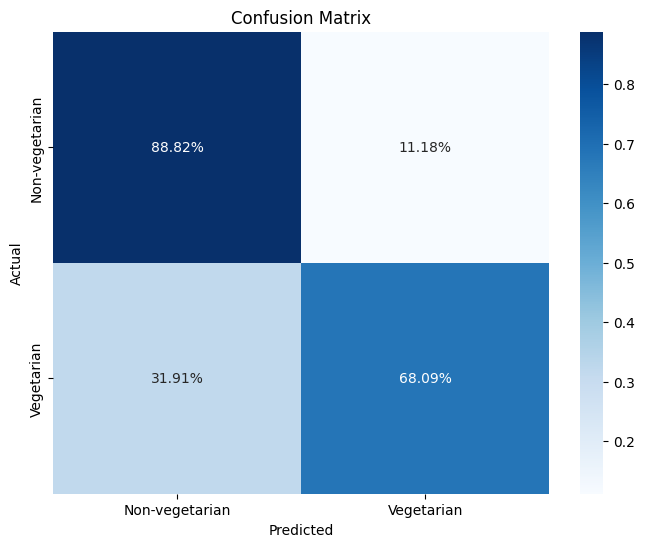



# 7 Dataset



1.   **Loading the Dataset** - We have loaded the dataset from google drive where we have stored all the images and its corresponding features are stored in a CSV file . We are laoding this dataset into a dataframe .


```
subset = {}
datadir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd/miniproject/', subset = subset,verbose=1,overwrite=False)
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
```



2.   **Filtering the dataset** - We have a dataframe with 3250 images containing 11 features  but  we will focus only on the images which fall in vegetarian and non-vegetarian category .


```
MLENDYD_df = MLENDYD_df[
    MLENDYD_df['Diet'].isin(['non_vegetarian', 'vegetarian'])
]
```
3.   **Extracting essential features from existing features** - Here we will encode vegetarian - 1 and non-vegetarian - 0 and introduce a new column 'Diet_Map' based on existing 'Diet' column



```
def map_diet(diet):
    if 'vegetarian' == diet.lower():
        return 1
    else :
      return 0

MLENDYD_df['Diet_Map'] = MLENDYD_df['Diet'].apply(map_diet)
```
We have also introduced a new column 'Path' based on our existing index 'filename'


```
base_path = "/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/"
filtered_df['Path'] = base_path + filtered_df.index.astype(str)
```

Then we have divided the data into train and test dataframe with 70:30 ratio based on 'Benchmark' column.

```
train_df = filtered_df[filtered_df['Benchmark_A'] == 'Train']
test_df = filtered_df[filtered_df['Benchmark_A'] == 'Test']
```
After this we have appended the content of 'Diet' and 'Ingredient' column into a single string .



```
train_df['AppendedString'] = train_df['Dish_name'] + ' ' + train_df['Ingredients']
test_df['AppendedString'] = test_df['Dish_name'] + ' ' + test_df['Ingredients']
```
Now , X_train contains the 'AppendedString' values and y_train is the label which contains'Diet_Map'



# 8 Results

Future enhancements can be done to this existing model by extracting and adding the image features by using Tensor Flow or CNN .

# 9 Conclusions

We can deduce that the prediction model which uses multinomial Naive Bayes and TF-IDF features provides us with commendable results with 93 % training accuracy and 79% testing accuracy . This suggests that this model proves to be robust and well suited for the task .

Training Accuracy:	 0.9344341913550267
Test  Accuracy:	 0.7945516458569807


In [ ]:
!pip install mlend

In [4]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
subset = {}
datadir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd/miniproject/', subset = subset,verbose=1,overwrite=False)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


In [6]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [7]:
MLENDYD_df = MLENDYD_df[
    MLENDYD_df['Diet'].isin(['non_vegetarian', 'vegetarian'])
]

In [8]:
MLENDYD_df.head()

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train


In [10]:
def map_diet(diet):
    if 'vegetarian' == diet.lower():
        return 1
    else :
      return 0

In [15]:
MLENDYD_df['Diet_Map'] = MLENDYD_df['Diet'].apply(map_diet)

<ipython-input-15-aba02d7f3de5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
base_path = "/content/drive/MyDrive/Data/MLEnd/miniproject/yummy/MLEndYD_images/"
MLENDYD_df['Path'] = base_path + MLENDYD_df.index.astype(str)

<ipython-input-16-6ce5c60d5207>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [18]:
train_df = MLENDYD_df[MLENDYD_df['Benchmark_A'] == 'Train']
test_df = MLENDYD_df[MLENDYD_df['Benchmark_A'] == 'Test']

In [19]:
train_df['AppendedString'] = train_df['Dish_name'] + ' ' + train_df['Ingredients']
test_df['AppendedString'] = test_df['Dish_name'] + ' ' + test_df['Ingredients']

<ipython-input-19-59a0342e83c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-19-59a0342e83c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
X_train = train_df['AppendedString'].values
X_test = test_df['AppendedString'].values

In [21]:
y_train = train_df['Diet_Map'].values
y_test = test_df['Diet_Map'].values

In [22]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [24]:
y_pred = model.predict(X_test_tfidf)
y_pred2 = model.predict(X_train_tfidf)

In [26]:
train_accuracy = np.mean(y_pred2==y_train)
test_accuracy  = np.mean(y_pred==y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.9344341913550267
Test  Accuracy:	 0.7945516458569807


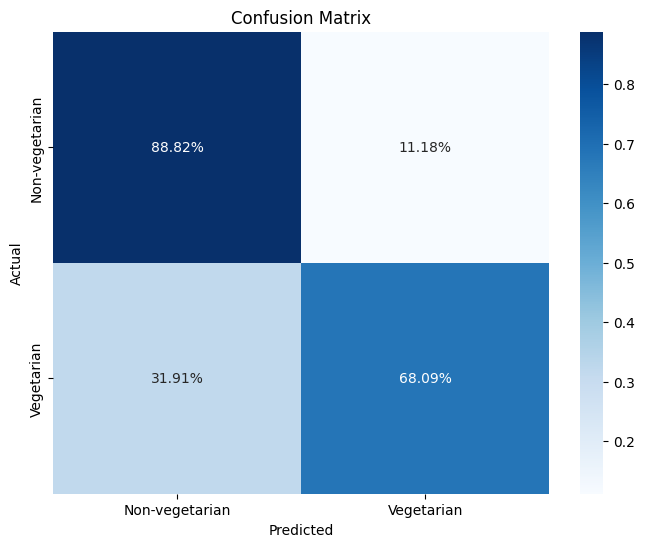

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Non-vegetarian', 'Vegetarian'], yticklabels=['Non-vegetarian', 'Vegetarian'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


https://www.datacamp.com/blog/classification-machine-learning